In [302]:
import pandas as pd
from  matplotlib import pyplot as plt
import seaborn as sn
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [303]:
data= pd.read_csv("D:\\datasets\\credit-screening.csv")
data.head()

,%X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,class label
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [304]:
data.shape

(690, 16)

# Preprocessing

In [305]:
data.describe()

,X3,X8,X11,X15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [306]:
data.dtypes

%X1             object
X2              object
X3             float64
X4              object
X5              object
X6              object
X7              object
X8             float64
X9              object
X10             object
X11              int64
X12             object
X13             object
X14             object
X15              int64
class label     object
dtype: object

In [307]:
#check in any other characters in X2,X3,X8,x14,X15
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [308]:
pun='!"#$%&\'()*,./:;<=>?@[\\]^_`{|}~'
def split(word): 
    return [char for char in word]  
chars=list(split(pun))

data=data.replace(to_replace =chars,value =np.NaN) 

In [309]:
data.isnull().sum()

%X1            12
X2             12
X3              0
X4              6
X5              6
X6              9
X7              9
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14            13
X15             0
class label     0
dtype: int64

In [280]:
data.dropna(axis=0, inplace=True)
data.isnull().sum()

%X1            0
X2             0
X3             0
X4             0
X5             0
X6             0
X7             0
X8             0
X9             0
X10            0
X11            0
X12            0
X13            0
X14            0
X15            0
class label    0
dtype: int64

In [281]:
data.head()

,%X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,class label
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [282]:
data.shape

(653, 16)

In [283]:
data.dtypes

%X1             object
X2              object
X3             float64
X4              object
X5              object
X6              object
X7              object
X8             float64
X9              object
X10             object
X11              int64
X12             object
X13             object
X14             object
X15              int64
class label     object
dtype: object

In [284]:
data.X2=pd.to_numeric(data.X2)
data.dtypes

%X1             object
X2             float64
X3             float64
X4              object
X5              object
X6              object
X7              object
X8             float64
X9              object
X10             object
X11              int64
X12             object
X13             object
X14             object
X15              int64
class label     object
dtype: object

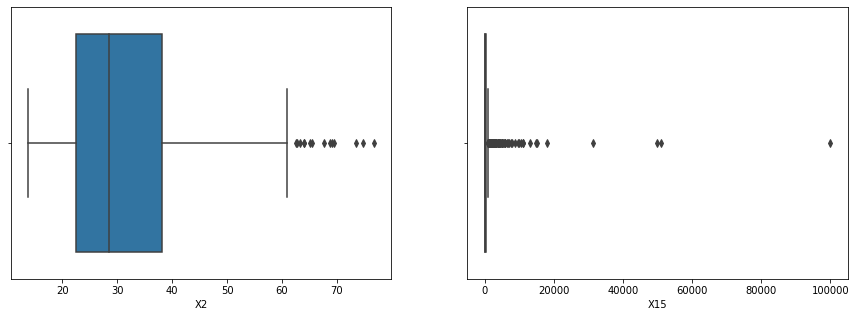

In [286]:
#Outlier
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1,2, figsize = (15,5))

sns.boxplot(data.X2, ax = axs[0])
sns.boxplot(data.X15, ax = axs[1])

plt.tight_layout
plt.show()

In [287]:
#Outlier Treatment for x2
Q1 = data.X2.quantile(0.25)
Q3 = data.X2.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.X2 >= Q1 - 1.5*IQR) & (data.X2 <= Q3 + 1.5*IQR)]

In [288]:
# outlier treatment for X15
Q1 = data.X15.quantile(0.25)
Q3 = data.X15.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.X15 >= Q1 - 1.5*IQR) & (data.X15 <= Q3 + 1.5*IQR)]

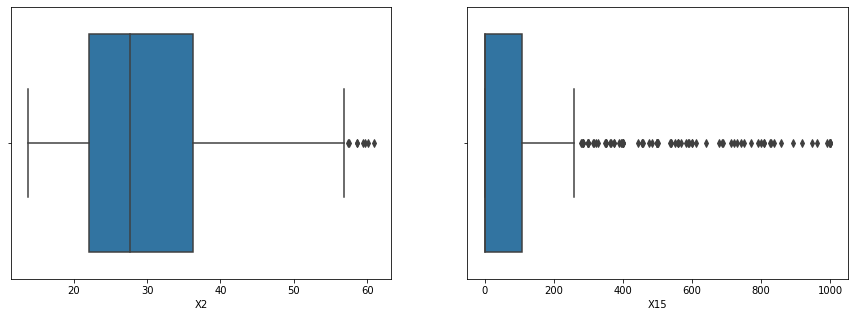

In [289]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

sns.boxplot(data.X2, ax = axs[0])
sns.boxplot(data.X15, ax = axs[1])

plt.tight_layout
plt.show()

In [110]:
data.shape

(555, 16)

# Now we have to convert X1,X4,	X5,	X6,	X7,	X9,	X10,X12,X13 variables into numerical data



In [111]:
data.head()

,%X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,class label
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [112]:
#Function for dictonary to store coding info about varaibles
info={}
def code_map(le,name):
    global info
    job_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    info[name]=job_name_mapping
    print(name,' :varaiable successfully coded')

In [113]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
data['%X1']=le.fit_transform(data['%X1'])
code_map(le,'%X1')

data['X4']=le.fit_transform(data['X4'])
code_map(le,'X4')

data['X5']=le.fit_transform(data['X5'])
code_map(le,'X5')

data['X6']=le.fit_transform(data['X6'])
code_map(le,'X6')

data['X7']=le.fit_transform(data['X7'])
code_map(le,'X7')

data['X9']=le.fit_transform(data['X9'])
code_map(le,'X9')

data['X10']=le.fit_transform(data['X10'])
code_map(le,'X10')

data['X12']=le.fit_transform(data['X12'])
code_map(le,'X12')

data['X13']=le.fit_transform(data['X13'])
code_map(le,'X13')

data.head()

%X1  :varaiable successfully coded
X4  :varaiable successfully coded
X5  :varaiable successfully coded
X6  :varaiable successfully coded
X7  :varaiable successfully coded
X9  :varaiable successfully coded
X10  :varaiable successfully coded
X12  :varaiable successfully coded
X13  :varaiable successfully coded


,%X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,class label
0,2,30.83,0.000,1,0,13,8,1.25,1,1,1,0,0,00202,0,+
1,1,58.67,4.460,1,0,11,4,3.04,1,1,6,0,0,00043,560,+
2,1,24.50,0.500,1,0,11,4,1.50,1,0,0,0,0,00280,824,+
3,2,27.83,1.540,1,0,13,8,3.75,1,1,5,1,0,00100,3,+
4,2,20.17,5.625,1,0,13,8,1.71,1,0,0,0,2,00120,0,+


In [114]:
#coded data
info

{'%X1': {'?': 0, 'a': 1, 'b': 2},
 'X4': {'l': 0, 'u': 1, 'y': 2},
 'X5': {'g': 0, 'gg': 1, 'p': 2},
 'X6': {'?': 0,
  'aa': 1,
  'c': 2,
  'cc': 3,
  'd': 4,
  'e': 5,
  'ff': 6,
  'i': 7,
  'j': 8,
  'k': 9,
  'm': 10,
  'q': 11,
  'r': 12,
  'w': 13,
  'x': 14},
 'X7': {'?': 0,
  'bb': 1,
  'dd': 2,
  'ff': 3,
  'h': 4,
  'j': 5,
  'n': 6,
  'o': 7,
  'v': 8,
  'z': 9},
 'X9': {'f': 0, 't': 1},
 'X10': {'f': 0, 't': 1},
 'X12': {'f': 0, 't': 1},
 'X13': {'g': 0, 'p': 1, 's': 2}}

In [115]:
#Correlation
data.corr(method='pearson')

,%X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X15
%X1,1.000000,0.059702,0.000892,0.037958,0.030319,0.001563,0.085104,0.114469,0.041874,-0.052548,0.026849,0.046226,0.068913,-0.052107
X2,0.059702,1.000000,0.113973,-0.079490,-0.087306,0.034905,-0.208915,0.380424,0.164611,0.013842,0.147272,0.081754,0.005050,-0.014190
X3,0.000892,0.113973,1.000000,-0.075675,-0.081620,0.041003,-0.043448,0.249376,0.275219,0.181276,0.284616,0.023206,-0.110240,0.067727
X4,0.037958,-0.079490,-0.075675,1.000000,0.989324,-0.068304,-0.035746,-0.054553,-0.110764,-0.152508,-0.082525,-0.011587,-0.035491,-0.067770
X5,0.030319,-0.087306,-0.081620,0.989324,1.000000,-0.074177,-0.043788,-0.037924,-0.117478,-0.158525,-0.085709,-0.005001,-0.016793,-0.071451
X6,0.001563,0.034905,0.041003,-0.068304,-0.074177,1.000000,0.017280,0.045092,0.113705,0.160043,0.004443,0.068186,0.016558,0.031650
X7,0.085104,-0.208915,-0.043448,-0.035746,-0.043788,0.017280,1.000000,-0.118161,-0.043282,0.002710,-0.025387,0.012644,0.024741,-0.022699
X8,0.114469,0.380424,0.249376,-0.054553,-0.037924,0.045092,-0.118161,1.000000,0.319084,0.175417,0.310425,0.158313,0.029622,0.058406
X9,0.041874,0.164611,0.275219,-0.110764,-0.117478,0.113705,-0.043282,0.319084,1.000000,0.393757,0.329610,0.095960,-0.082986,0.197974
X10,-0.052548,0.013842,0.181276,-0.152508,-0.158525,0.160043,0.002710,0.175417,0.393757,1.000000,0.526387,0.049016,-0.223637,0.267935


Here i found X4 and X5 have highly correlated to each other. so i have to remove X4 or X5

In [116]:
data.drop(['X5'], axis=1, inplace =True )

In [117]:
data.head()

,%X1,X2,X3,X4,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,class label
0,2,30.83,0.000,1,13,8,1.25,1,1,1,0,0,00202,0,+
1,1,58.67,4.460,1,11,4,3.04,1,1,6,0,0,00043,560,+
2,1,24.50,0.500,1,11,4,1.50,1,0,0,0,0,00280,824,+
3,2,27.83,1.540,1,13,8,3.75,1,1,5,1,0,00100,3,+
4,2,20.17,5.625,1,13,8,1.71,1,0,0,0,2,00120,0,+


In [118]:
#Splitting data
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [119]:
#Model Training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =1)

# Binary Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
LR=LogisticRegression()
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)
cnf_mat=confusion_matrix(y_test,y_pred)
print(cnf_mat)
print(accuracy_score(y_test,y_pred))

[[43  3]
 [ 8 57]]
0.9009009009009009


# Ordinal Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
olr = LogisticRegression(solver = 'lbfgs')
olr.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.9009009009009009


# Multi Class Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
# Train model
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('Accuracy thru Multiclass Logistic Regression ', accuracy_score(y_test, y_pred))

Accuracy thru Multiclass Logistic Regression  0.8828828828828829


In [126]:
#confusion matrix
from sklearn import metrics
cnf_mat=metrics.confusion_matrix(y_test,y_pred)
print(cnf_mat)

[[43  3]
 [10 55]]


# QuadraticDiscriminantAnalysis


In [127]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA=QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
y_pred = QDA.predict(X_test)

print('Accuracy thru Multiclass Logistic Regression ', accuracy_score(y_test, y_pred))

Accuracy thru Multiclass Logistic Regression  0.8468468468468469


# Linear Discriminant Analysis

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDM=LinearDiscriminantAnalysis()
LDM.fit(X_train,y_train)
y_pred = QDA.predict(X_test)

print('Accuracy thru Multiclass Logistic Regression ', accuracy_score(y_test, y_pred))

Accuracy thru Multiclass Logistic Regression  0.8468468468468469


In [51]:
#confusion matrix
from sklearn import metrics
cnf_mat=metrics.confusion_matrix(y_test,y_pred)
print(cnf_mat)

[[51  7]
 [53 23]]


# KNN

In [157]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=23)
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
accuracy_score(y_test,y_pred)

0.6756756756756757

In [144]:
#confusion matrix
from sklearn import metrics
cnf_mat=metrics.confusion_matrix(y_test,y_pred)
print(cnf_mat)

[[16 30]
 [ 9 56]]


In [159]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = KNN, X = X_train, y = y_train, cv = 10,n_jobs=-1)
accuracies3.mean()

0.6559537232793048

# SVM


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 1,degree=3)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

# NaiveBayes


In [169]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
GNB=BernoulliNB()
GNB.fit(X_train,y_train)
y_pred =GNB.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8468468468468469


In [57]:
#confusion matrix
from sklearn import metrics
cnf_mat=metrics.confusion_matrix(y_test,y_pred)
print(cnf_mat)

[[35 23]
 [ 8 68]]


# Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
y_pred =DTC.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8059701492537313


In [147]:
#confusion matrix
from sklearn import metrics
cnf_mat=metrics.confusion_matrix(y_test,y_pred)
print(cnf_mat)

[[32 14]
 [ 3 62]]


# Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=80, random_state=0,bootstrap =True,criterion='entropy')
RFC.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8918918918918919


In [182]:
#Hyper parameter tuning

grid_param ={
                'n_estimators': [50,100,300],
                'criterion': ['gini', 'entropy'],
                'bootstrap': [True, False]
            }

from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(estimator=RFC,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}
0.8536036036036037


# Gradient Boost

In [172]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=1)
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9099099099099099


In all the models Binary Logisting Regression ,Gradient Boosting are give 90.99 % accuracy

In [311]:
#So i have to save model
from sklearn.externals import joblib
joblib.dump(KNN ,"Credit_Card_Approval_GB.pkl")

['Credit_Card_Approval_GB.pkl']

In [312]:
#Load Saved Model from joblib
CCA=joblib.load("Credit_Card_Approval_GB.pkl")
CCA

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [65]:
data.head()

,%X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,class label
0,3,30.83,0.000,3,2,14,9,1.25,2,2,1,1,1,00202,0,+
1,2,58.67,4.460,3,2,12,5,3.04,2,2,6,1,1,00043,560,+
2,2,24.50,0.500,3,2,12,5,1.50,2,1,0,1,1,00280,824,+
3,3,27.83,1.540,3,2,14,9,3.75,2,2,5,2,1,00100,3,+
4,3,20.17,5.625,3,2,14,9,1.71,2,1,0,1,3,00120,0,+


In [313]:
#Testing
X1= 2
X2=60.00
X3= 2
X4= 3
X6= 8
X7= 9
X8 =1
X9 =2
X10 =2
X11=4
X12=1
X13=2 
X14='00043'
X15=200
input=[X1,X2,X3,X4,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15]
outcome=CCA.predict([input])
if outcome=='+':
    print("Creditcard approved")
else:
    print("Creditcard not approved")

Creditcard not approved


In [314]:
input=[3,30.83,0,3,14,9,1.25,2,2,1,1,1,202,0]
outcome=CCA.predict([input])
if outcome=='+':
    print("Creditcard approved")
else:
    print("Creditcard not approved")

Creditcard not approved
